<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Graphique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Run le file d'analyse principale pour pouvoir acceder au data et variables
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
!jupyter nbconvert --to python Project_NBA_GroupM/Analyse_Principale.ipynb
%run Project_NBA_GroupM/Analyse_Principale.py
!pip install svgpath2mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import io
import os
import xml.etree.ElementTree as ET
from svgpath2mpl import parse_path
import matplotlib.patches as patches

fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
[NbConvertApp] Converting notebook Project_NBA_GroupM/Analyse_Principale.ipynb to python
[NbConvertApp] Writing 16662 bytes to Project_NBA_GroupM/Analyse_Principale.py
fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.

 Winners based on our model vs actual winners:
    Season Team  Final_Power_Score  Actual Rank Team  Win% of actual winner
0     2005  SAC           0.790386            8  PHO               0.756098
1     2006  PHO           0.881307            4  DET               0.780488
2     2007  DET           0.772769            4  DAL               0.817073
3     2008  LAL           0.806611            3  BOS               0.804878
4     2009  DET           0.823724           17  CLE               0.804878
5     2010  SAS           0.780098           12  CLE               0.743902
6     2011  HOU           0.796630           14  CHI               0.7

NameError: name 'MVP_reg' is not defined

<Figure size 640x480 with 0 Axes>

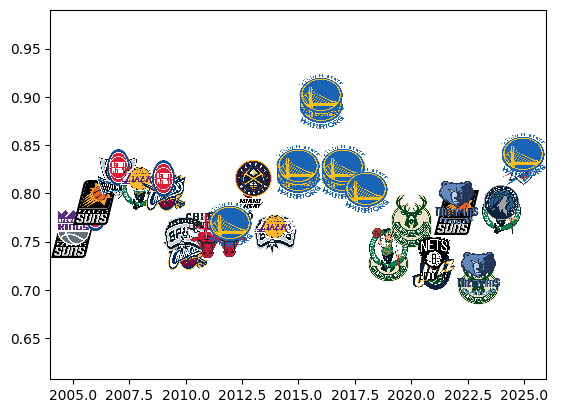

In [12]:
 #Plot of predicted league champions vs real one
base_folder = 'Project_NBA_GroupM'
folder = os.path.join(base_folder, 'Logo')  # now points to Project_NBA_GroupM/Logo

images = {}
for filename in os.listdir(folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        key = os.path.splitext(filename)[0]  # filename without extension
        images[key] = os.path.join(folder, filename)


fig, ax = plt.subplots()

ax.scatter(Comparaison['Season'], Comparaison['Win% of actual winner'], alpha=0)

for i, row in Comparaison.iterrows():
    x = row['Season']
    y = row['Win% of actual winner']

    # First image (actual winner, at exact point)
    img1 = Image.open(images[row.iloc[4]]).convert("RGBA")
    img1 = img1.resize((1080, 1080), resample=Image.LANCZOS)
    im1 = OffsetImage(img1, zoom=0.03)
    ab1 = AnnotationBbox(im1, (x, y), frameon=False)
    ax.add_artist(ab1)

    # Second image (e.g. predicted winner, slightly above the point)
    img2 = Image.open(images[row.iloc[1]]).convert("RGBA")
    img2 = img2.resize((1080, 1080), resample=Image.LANCZOS)
    im2 = OffsetImage(img2, zoom=0.03)
    ab2 = AnnotationBbox(im2, (x, y + 0.01), frameon=False)  # small vertical offset
    ax.add_artist(ab2)

ax.set_xlim(Comparaison['Season'].min() - 1, Comparaison['Season'].max() + 1)
ax.set_ylim(Comparaison['Win% of actual winner'].min() - 0.1,
            Comparaison['Win% of actual winner'].max() + 0.1)
plt.show()

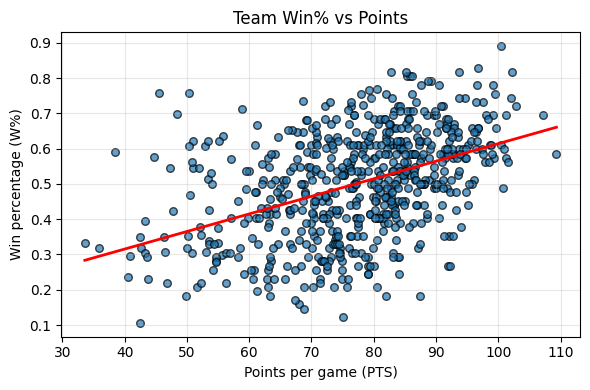

In [29]:
 #Plot team win% vs Point per games
norm=nbas_data_full
norm['PTS']=(norm['PTS']*norm['G'])/82
#Most player played less than 82 game so the mean ppg of player isn't equal to mean ppg of team that why we normalize by 82(total game of a team) to have actual team data
plotdf=norm.groupby(['Season','Team'])[all_stats].sum().reset_index()
plotdf= pd.merge(plotdf,sts_data_full,on=['Team','Season'])
plotdf = plotdf.drop(columns=['Rk'])

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(plotdf['PTS'], plotdf['W%'],
           alpha=0.7,
           s=30,
           color='tab:blue',
           edgecolor='k')

ax.set_xlabel('Points per game (PTS)')
ax.set_ylabel('Win percentage (W%)')
ax.set_title('Team Win% vs Points')
ax.grid(True, alpha=0.3)


x = plotdf['PTS'].values
y = plotdf['W%'].values

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Sort x for a nice line
x_line = np.linspace(x.min(), x.max(), 100)
ax.plot(x_line, p(x_line), color='red', linewidth=2, label='Trend line')



plt.tight_layout()
plt.show()